In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv("crime.csv")

In [8]:
df.head()

,incident_id,case_number,incident_datetime,incident_type_primary,incident_description,clearance_type,address_1,address_2,city,state,zip,country,latitude,longitude,created_at,updated_at,location,hour_of_day,day_of_week,parent_incident_type
0,100068327,12-02555,02/10/2012 10:46:00 AM,[CTPD]-THEFT - $50 TO $200 - AUTO ACCESS,THEFT - $50 TO $200 - AUTO ACCESS,NaN,600 Block TOOKANY CREEK PKWY,NaN,CHELTENHAM,PA,19012.0,NaN,40.068875,-75.121003,02/21/2012 03:15:04 PM,02/21/2012 03:15:06 PM,POINT (-75.121003 40.068875),10,Friday,Theft from Vehicle
1,100068328,12-02654,02/11/2012 10:14:00 PM,[CTPD]-ACCIDENT - NON REPORTABLE,ACCIDENT - NON REPORTABLE,NaN,200 Block BICKLEY RD,NaN,WYNCOTE,PA,19038.0,NaN,40.097921,-75.154642,02/21/2012 03:15:04 PM,02/21/2012 03:15:07 PM,POINT (-75.154642 40.097921),22,Saturday,Traffic
2,100068329,12-02598,02/10/2012 05:51:00 PM,[CTPD]-THEFT - $200 AND OVER - RETAIL,THEFT - $200 AND OVER - RETAIL,NaN,2400 Block SHOPPERS LN,NaN,WYNCOTE,PA,19095.0,NaN,40.076851,-75.154990,02/21/2012 03:15:04 PM,02/21/2012 03:15:07 PM,POINT (-75.15499 40.076851),17,Friday,Theft
3,100068331,12-02535,02/09/2012 10:18:00 PM,[CTPD]-BURGLARY - FORCE - RESIDENCE - UNK,BURGLARY - FORCE - RESIDENCE - UNK,NaN,600 Block MEETINGHOUSE RD,NaN,ELKINS PARK,PA,NaN,NaN,40.085155,-75.124921,02/21/2012 03:15:04 PM,02/21/2012 03:15:07 PM,POINT (-75.124921 40.085155),22,Thursday,Breaking & Entering
4,100068332,12-02556,02/10/2012 11:19:00 AM,[CTPD]-FRAUD - IDENTITY THEFT,FRAUD - IDENTITY THEFT,NaN,1 Block LIMEKILN TPK,NaN,GLENSIDE,PA,19038.0,NaN,40.106723,-75.163022,02/21/2012 03:15:04 PM,02/21/2012 03:15:07 PM,POINT (-75.163022 40.106723),11,Friday,Theft


## Data Cleaning

In [9]:
# 1. Handle Missing Values

df.dropna(subset=['incident_id', 'case_number'], inplace=True) 
df['zip'] = df['zip'].fillna(0).astype(int) 
df.fillna('Unknown', inplace=True) 

C:\Users\PC\AppData\Local\Temp\ipykernel_6784\1603625252.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Unknown' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.fillna('Unknown', inplace=True)


In [10]:
# 2. Convert Data Types

df['incident_datetime'] = pd.to_datetime(df['incident_datetime'], errors='coerce')  
df['created_at'] = pd.to_datetime(df['created_at'], errors='coerce')
df['updated_at'] = pd.to_datetime(df['updated_at'], errors='coerce')

C:\Users\PC\AppData\Local\Temp\ipykernel_6784\2731192273.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['created_at'] = pd.to_datetime(df['created_at'], errors='coerce')
C:\Users\PC\AppData\Local\Temp\ipykernel_6784\2731192273.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['updated_at'] = pd.to_datetime(df['updated_at'], errors='coerce')


In [11]:
# 3. Remove Duplicates
df.drop_duplicates(inplace=True)

In [13]:
# 5. Validate Numerical Values
df = df[(df['latitude'].between(-90, 90)) & (df['longitude'].between(-180, 180))]  
df = df[(df['hour_of_day'] >= 0) & (df['hour_of_day'] <= 23)]

TypeError: '>=' not supported between instances of 'str' and 'int'

In [14]:
# 6. Drop Unnecessary Columns
df.drop(columns=['clearance_type', 'address_2', 'country'], inplace=True)

In [17]:
# 7. Feature Engineering
df['incident_year'] = df['incident_datetime'].dt.year
df['incident_month'] = df['incident_datetime'].dt.month
df['incident_hour'] = df['incident_datetime'].dt.hour
df['day_of_week'] = df['incident_datetime'].dt.day_name()

In [18]:
text_cols = ['incident_type_primary', 'incident_description', 
             'address_1', 'city', 'state', 'location', 'parent_incident_type']
df[text_cols] = df[text_cols].apply(lambda x: x.str.strip().str.lower())

In [19]:
df.dropna(subset=['created_at'], inplace=True)
df.dropna(subset=['updated_at'], inplace=True)

In [20]:
# Save the cleaned data
df.to_csv("crime_cleaned.csv", index=False)

In [21]:
df.head()

,incident_id,case_number,incident_datetime,incident_type_primary,incident_description,address_1,city,state,zip,latitude,longitude,created_at,updated_at,location,hour_of_day,day_of_week,parent_incident_type,incident_year,incident_month,incident_hour
0,100068327,12-02555,2012-02-10 10:46:00,[ctpd]-theft - $50 to $200 - auto access,theft - $50 to $200 - auto access,600 block tookany creek pkwy,cheltenham,pa,19012,40.068875,-75.121003,2012-02-21 15:15:04,2012-02-21 15:15:06,point (-75.121003 40.068875),10,Friday,theft from vehicle,2012,2,10
1,100068328,12-02654,2012-02-11 22:14:00,[ctpd]-accident - non reportable,accident - non reportable,200 block bickley rd,wyncote,pa,19038,40.097921,-75.154642,2012-02-21 15:15:04,2012-02-21 15:15:07,point (-75.154642 40.097921),22,Saturday,traffic,2012,2,22
2,100068329,12-02598,2012-02-10 17:51:00,[ctpd]-theft - $200 and over - retail,theft - $200 and over - retail,2400 block shoppers ln,wyncote,pa,19095,40.076851,-75.15499,2012-02-21 15:15:04,2012-02-21 15:15:07,point (-75.15499 40.076851),17,Friday,theft,2012,2,17
3,100068331,12-02535,2012-02-09 22:18:00,[ctpd]-burglary - force - residence - unk,burglary - force - residence - unk,600 block meetinghouse rd,elkins park,pa,0,40.085155,-75.124921,2012-02-21 15:15:04,2012-02-21 15:15:07,point (-75.124921 40.085155),22,Thursday,breaking & entering,2012,2,22
4,100068332,12-02556,2012-02-10 11:19:00,[ctpd]-fraud - identity theft,fraud - identity theft,1 block limekiln tpk,glenside,pa,19038,40.106723,-75.163022,2012-02-21 15:15:04,2012-02-21 15:15:07,point (-75.163022 40.106723),11,Friday,theft,2012,2,11


In [22]:
df.dtypes

incident_id                       int64
case_number                      object
incident_datetime        datetime64[ns]
incident_type_primary            object
incident_description             object
address_1                        object
city                             object
state                            object
zip                               int64
latitude                         object
longitude                        object
created_at               datetime64[ns]
updated_at               datetime64[ns]
location                         object
hour_of_day                       int64
day_of_week                      object
parent_incident_type             object
incident_year                     int32
incident_month                    int32
incident_hour                     int32
dtype: object

In [23]:
# Reload the cleaned data with proper datetime conversion
cleaned_data = pd.read_csv("crime_cleaned.csv", parse_dates=['incident_datetime', 'created_at', 'updated_at'])

In [24]:
cleaned_data.head()

,incident_id,case_number,incident_datetime,incident_type_primary,incident_description,address_1,city,state,zip,latitude,longitude,created_at,updated_at,location,hour_of_day,day_of_week,parent_incident_type,incident_year,incident_month,incident_hour
0,100068327,12-02555,2012-02-10 10:46:00,[ctpd]-theft - $50 to $200 - auto access,theft - $50 to $200 - auto access,600 block tookany creek pkwy,cheltenham,pa,19012,40.0688751,-75.1210031,2012-02-21 15:15:04,2012-02-21 15:15:06,point (-75.121003 40.068875),10,Friday,theft from vehicle,2012,2,10
1,100068328,12-02654,2012-02-11 22:14:00,[ctpd]-accident - non reportable,accident - non reportable,200 block bickley rd,wyncote,pa,19038,40.097921,-75.154642,2012-02-21 15:15:04,2012-02-21 15:15:07,point (-75.154642 40.097921),22,Saturday,traffic,2012,2,22
2,100068329,12-02598,2012-02-10 17:51:00,[ctpd]-theft - $200 and over - retail,theft - $200 and over - retail,2400 block shoppers ln,wyncote,pa,19095,40.0768511,-75.1549903,2012-02-21 15:15:04,2012-02-21 15:15:07,point (-75.15499 40.076851),17,Friday,theft,2012,2,17
3,100068331,12-02535,2012-02-09 22:18:00,[ctpd]-burglary - force - residence - unk,burglary - force - residence - unk,600 block meetinghouse rd,elkins park,pa,0,40.085155,-75.124921,2012-02-21 15:15:04,2012-02-21 15:15:07,point (-75.124921 40.085155),22,Thursday,breaking & entering,2012,2,22
4,100068332,12-02556,2012-02-10 11:19:00,[ctpd]-fraud - identity theft,fraud - identity theft,1 block limekiln tpk,glenside,pa,19038,40.106723,-75.163022,2012-02-21 15:15:04,2012-02-21 15:15:07,point (-75.163022 40.106723),11,Friday,theft,2012,2,11


In [25]:
cleaned_data.dtypes

incident_id                       int64
case_number                      object
incident_datetime        datetime64[ns]
incident_type_primary            object
incident_description             object
address_1                        object
city                             object
state                            object
zip                               int64
latitude                         object
longitude                        object
created_at               datetime64[ns]
updated_at               datetime64[ns]
location                         object
hour_of_day                       int64
day_of_week                      object
parent_incident_type             object
incident_year                     int64
incident_month                    int64
incident_hour                     int64
dtype: object

## Visualization -

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\PC\AppData\Local\Temp\ipykernel_6784\1867242796.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=cleaned_data, x='incident_year', palette='viridis')


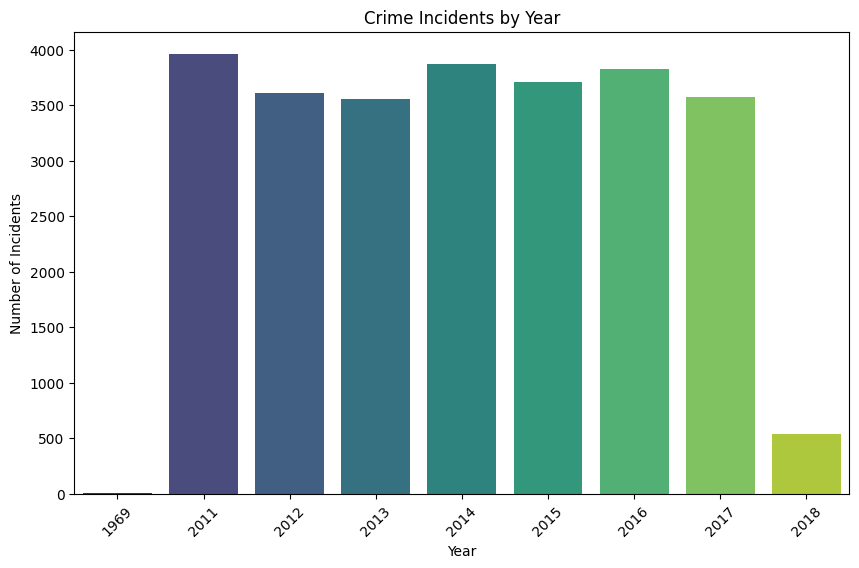

In [27]:
## 1. Crime Incidents by Year
## This bar chart shows the number of crime incidents recorded each year. It helps in identifying whether crime rates are increasing or decreasing over time. 
# Count the number of incidents per year

plt.figure(figsize=(10, 6))
sns.countplot(data=cleaned_data, x='incident_year', palette='viridis')
plt.title('Crime Incidents by Year')
plt.xlabel('Year')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45)
plt.show()

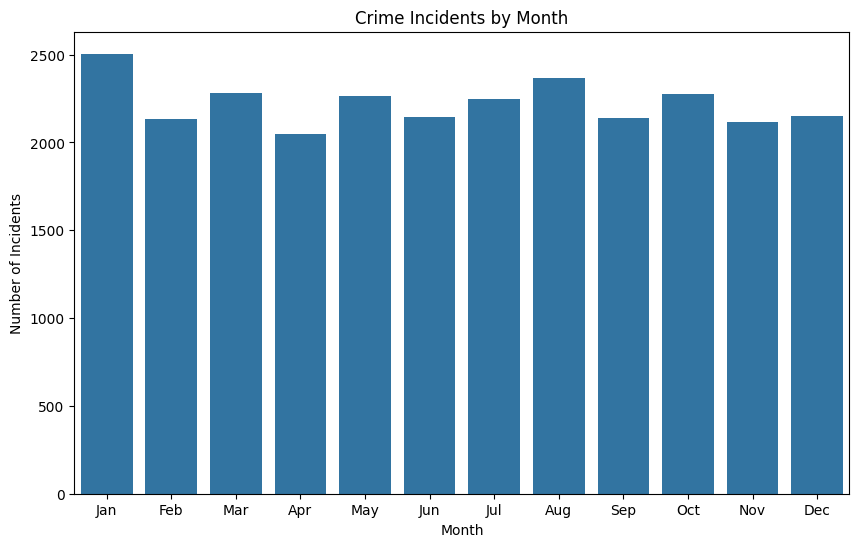

In [28]:
# 2. Crime Incidents by Month

# This plot shows the distribution of crime incidents across different months of the year. It helps to understand seasonal patterns, 
# which could indicate higher crime rates during certain times of the year

# Count the number of incidents per month
plt.figure(figsize=(10, 6))
sns.countplot(data=cleaned_data, x='incident_month')
plt.title('Crime Incidents by Month')
plt.xlabel('Month')
plt.ylabel('Number of Incidents')
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

C:\Users\PC\AppData\Local\Temp\ipykernel_6784\3322851236.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=cleaned_data, x='hour_of_day', palette='Blues')


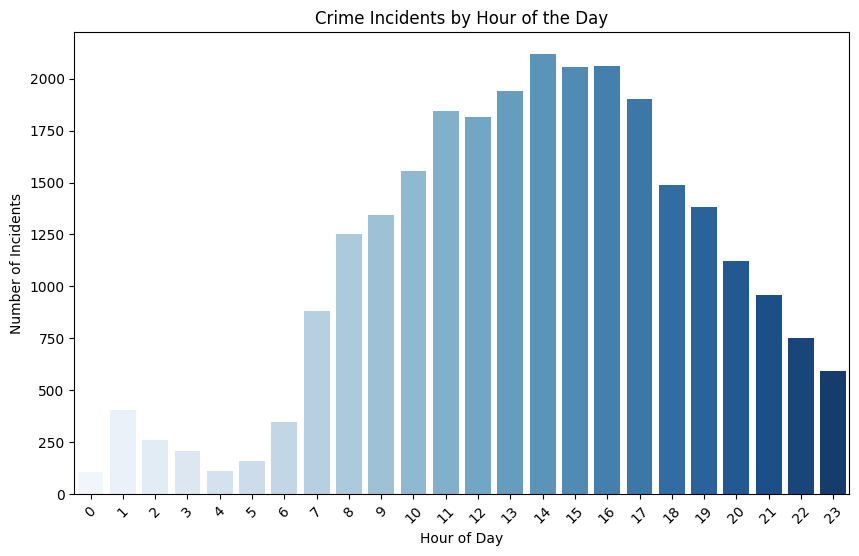

In [29]:
# 3. Crime Incidents by Hour of the Day

# This plot illustrates when crime incidents are most likely to occur throughout the day. It helps in identifying times of day when 
# law enforcement might need to allocate more resources, e.g., late-night or early-morning crimes.

# Count the number of incidents per hour of the day
plt.figure(figsize=(10, 6))
sns.countplot(data=cleaned_data, x='hour_of_day', palette='Blues')
plt.title('Crime Incidents by Hour of the Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45)
plt.show()

C:\Users\PC\AppData\Local\Temp\ipykernel_6784\2955002342.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=cleaned_data, x='day_of_week', palette='Set2', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])


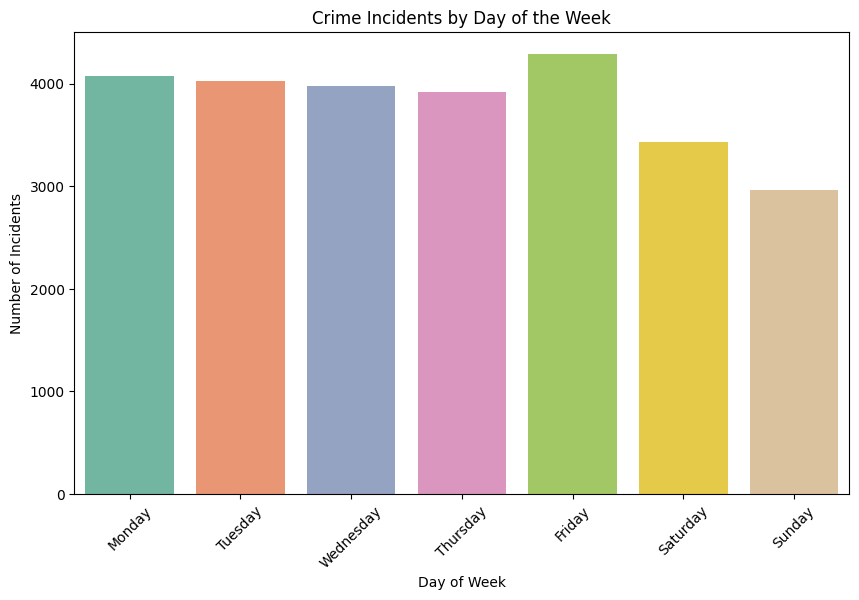

In [30]:
# 4. Crime Incidents by Day of the Week

# This plot shows the frequency of crime incidents across different days of the week, revealing patterns such as more crimes occurring on weekends.

# Count the number of incidents per day of the week
plt.figure(figsize=(10, 6))
sns.countplot(data=cleaned_data, x='day_of_week', palette='Set2', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Crime Incidents by Day of the Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45)
plt.show()

C:\Users\PC\AppData\Local\Temp\ipykernel_6784\3619227479.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=cleaned_data, x='state', palette='husl', order=cleaned_data['state'].value_counts().index)


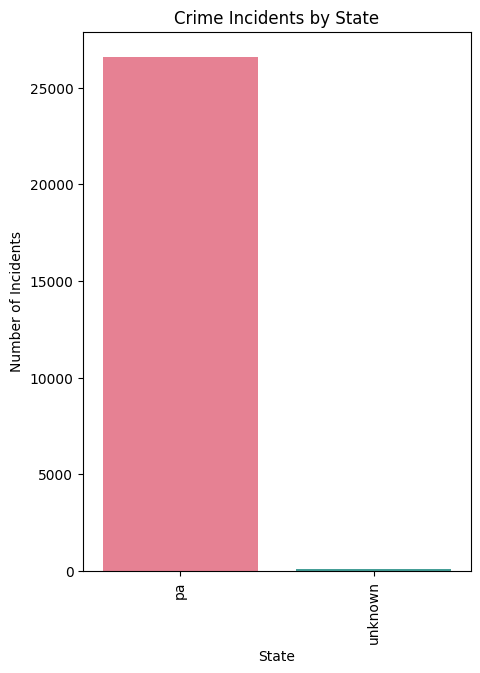

In [31]:
# 5. Crime Incidents by State

# This bar chart visualizes crime incidents by state, providing insights into regional crime patterns and helping to allocate 
# resources more effectively.

# Count the number of incidents per state
plt.figure(figsize=(5, 7))
sns.countplot(data=cleaned_data, x='state', palette='husl', order=cleaned_data['state'].value_counts().index)
plt.title('Crime Incidents by State')
plt.xlabel('State')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=90)
plt.show()

C:\Users\PC\AppData\Local\Temp\ipykernel_6784\4159054343.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=cleaned_data, x='incident_type_primary', palette='Set1', order=cleaned_data['incident_type_primary'].value_counts().index)


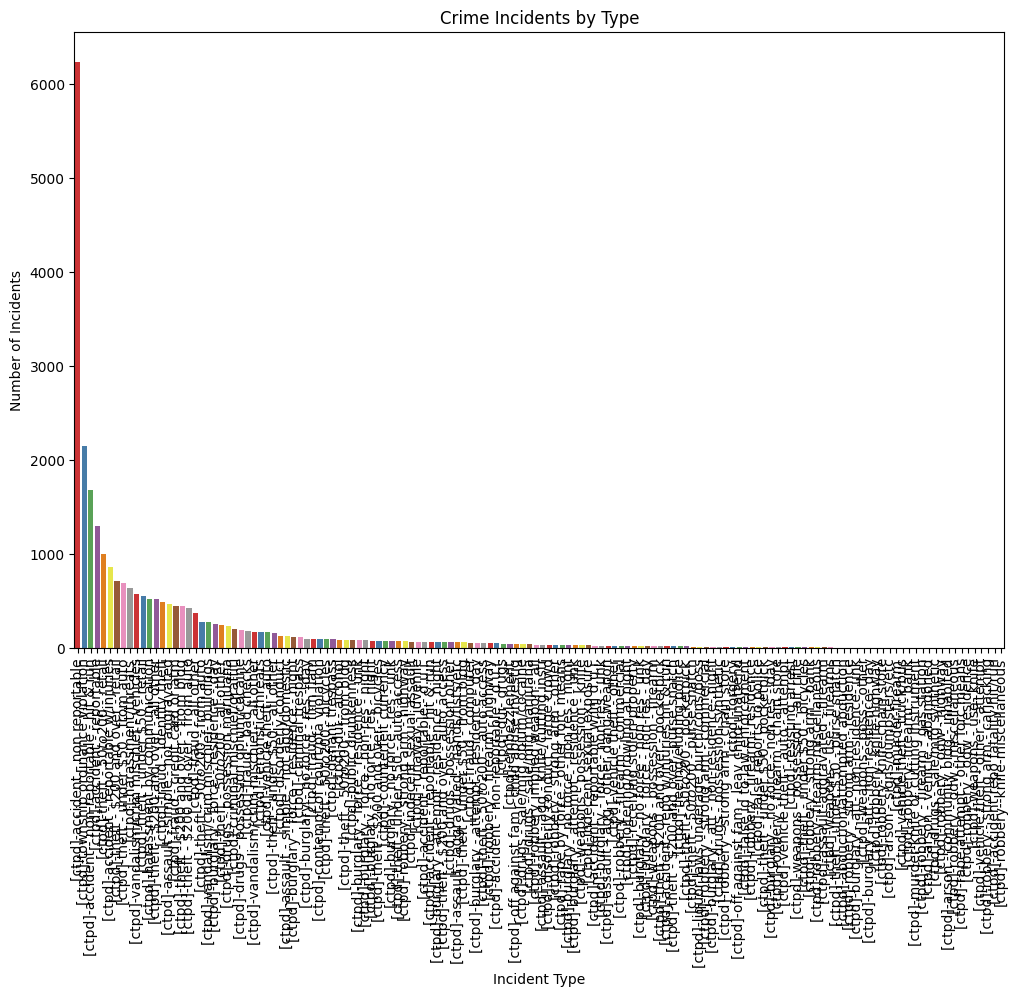

In [32]:
## 6. Crime Type Distribution

## This bar chart breaks down crime incidents by their primary type, offering insights into which crimes are most prevalent 
# and may require specialized attention.

# Count the number of incidents by type of incident
plt.figure(figsize=(12, 8))
sns.countplot(data=cleaned_data, x='incident_type_primary', palette='Set1', order=cleaned_data['incident_type_primary'].value_counts().index)
plt.title('Crime Incidents by Type')
plt.xlabel('Incident Type')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=90)
plt.show()

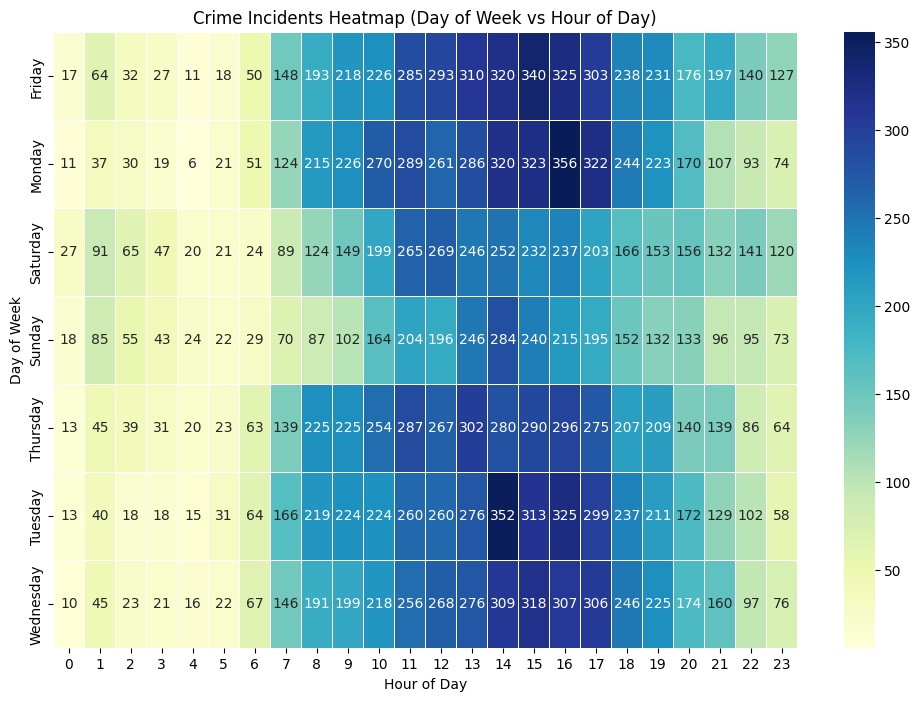

In [33]:
## 7. Heatmap for Crime Incidents by Hour and Day of the Week

## This heatmap visualizes the interaction between the hour of the day and the day of the week for crime incidents. It helps identify peak 
## times for crime and can assist in more targeted planning for policing shifts.

# Create a pivot table for day of week vs hour of day
heatmap_data = cleaned_data.groupby(['day_of_week', 'hour_of_day']).size().unstack()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt='d', linewidths=0.5)
plt.title('Crime Incidents Heatmap (Day of Week vs Hour of Day)')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')
plt.show()

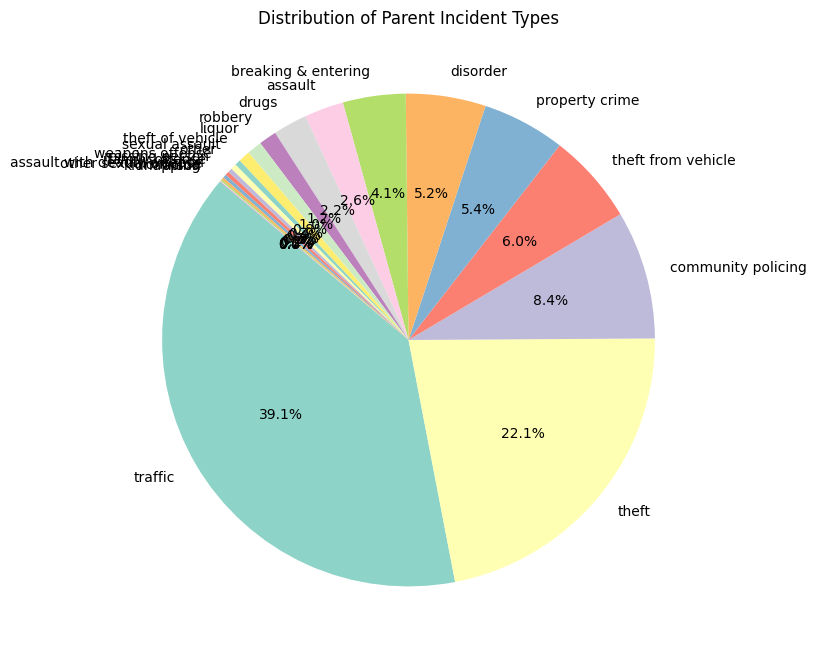

In [35]:
# Code to Create Pie Chart for parent_incident_type

## This pie chart shows the distribution of different parent incident types in the dataset. It visualizes the proportion of each type, 
## helping to identify which parent incident types are most common. The chart displays percentages for each category, allowing for easy comparison.

# Count the occurrences of each parent_incident_type
parent_type_counts = cleaned_data['parent_incident_type'].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(parent_type_counts, labels=parent_type_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Set3.colors)
plt.title('Distribution of Parent Incident Types')
plt.show()


In [36]:
# Plot the scatter map

## This scatter plot shows the geographic distribution of crime incidents by plotting their latitude and longitude. It helps identify crime 
## hotspots based on location.

plt.figure(figsize=(12, 8))
plt.scatter(cleaned_data['longitude'], cleaned_data['latitude'], c='blue', alpha=0.5, s=10)
plt.title('Geographic Distribution of Crime Incidents')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()

KeyboardInterrupt: 

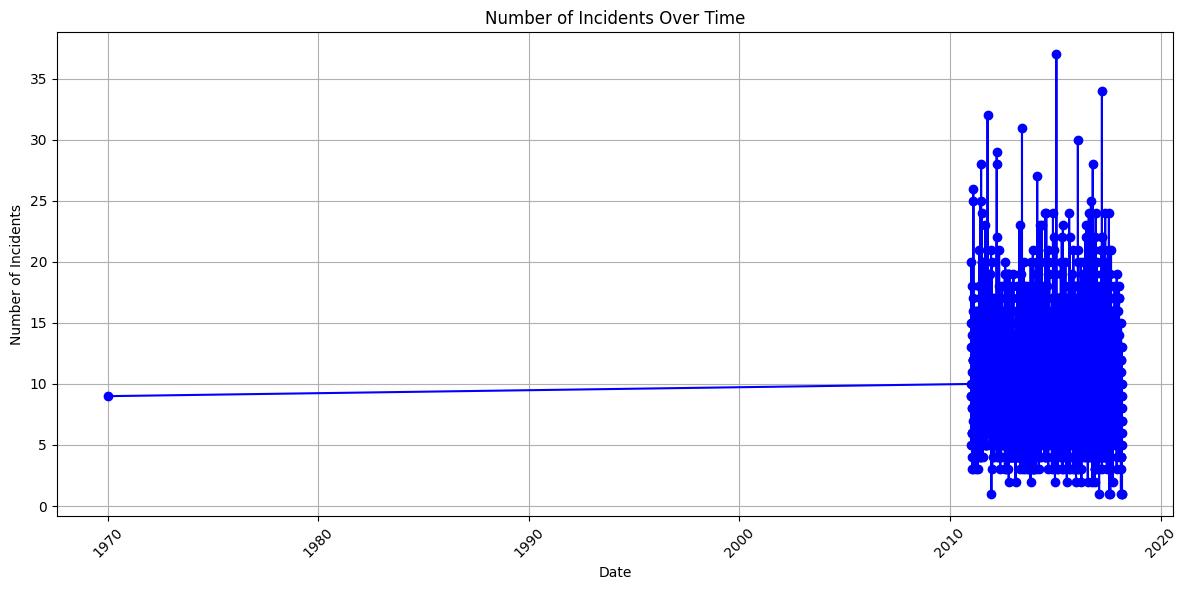

In [37]:
## This graph produces a clear and concise line graph showing trends in the number of incidents over time.

## This line graph shows the trend in the number of incidents over time. It groups the incidents by date and plots the total number of incidents per day.
## The graph helps visualize patterns, such as periods with higher or lower crime rates.

# Convert incident_datetime to date-only for grouping
cleaned_data['incident_date'] = cleaned_data['incident_datetime'].dt.date

# Group by date and count incidents
incidents_by_date = cleaned_data.groupby('incident_date').size()

# Plot the line graph
plt.figure(figsize=(12, 6))
plt.plot(incidents_by_date.index, incidents_by_date.values, marker='o', linestyle='-', color='blue')
plt.title('Number of Incidents Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Incidents')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

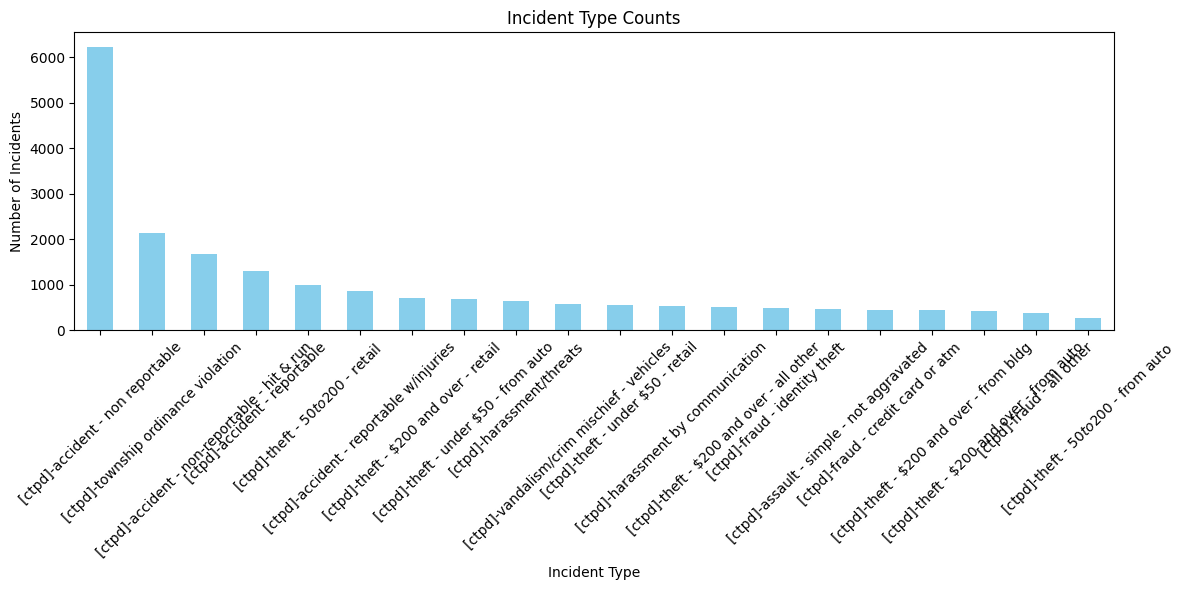

In [38]:
### This bar chart clearly visualizes the frequency of each incident_type_primary in your dataset.

## This bar chart displays the frequency of the top 20 primary incident types in the dataset. It helps identify the most common incident types, 
## providing insights into the distribution of crimes and which categories occur most frequently.

# Get the counts of each incident type
incident_type_counts = cleaned_data['incident_type_primary'].value_counts().head(20)

# Plot the bar chart
plt.figure(figsize=(12, 6))
incident_type_counts.plot(kind='bar', color='skyblue')
plt.title('Incident Type Counts')
plt.xlabel('Incident Type')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


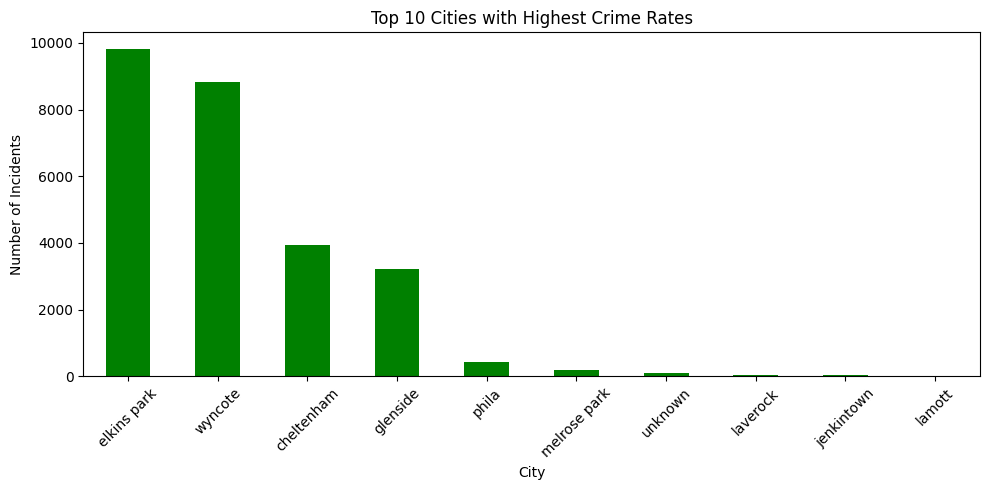

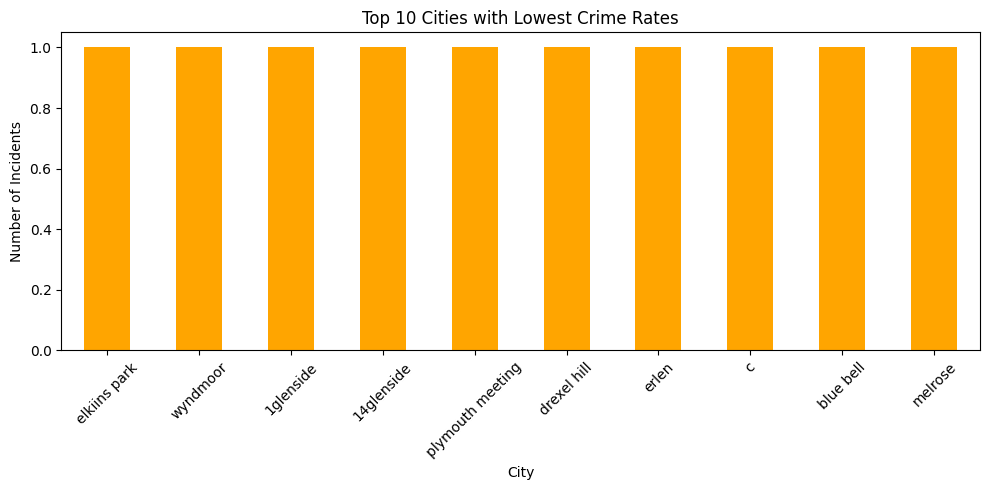

In [39]:
## This combined bar chart visualizes the top 10 cities with the highest and lowest crime rates.

# Group by city and count incidents
city_crime_counts = cleaned_data['city'].value_counts()

# Get the top 10 and bottom 10 cities
top_10_cities = city_crime_counts.head(10)
bottom_10_cities = city_crime_counts.tail(10)

# Plot the bar chart for the top 5 cities
plt.figure(figsize=(10, 5))
top_10_cities.plot(kind='bar', color='green')
plt.title('Top 10 Cities with Highest Crime Rates')
plt.xlabel('City')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot the bar chart for the bottom 5 cities
plt.figure(figsize=(10, 5))
bottom_10_cities.plot(kind='bar', color='orange')
plt.title('Top 10 Cities with Lowest Crime Rates')
plt.xlabel('City')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

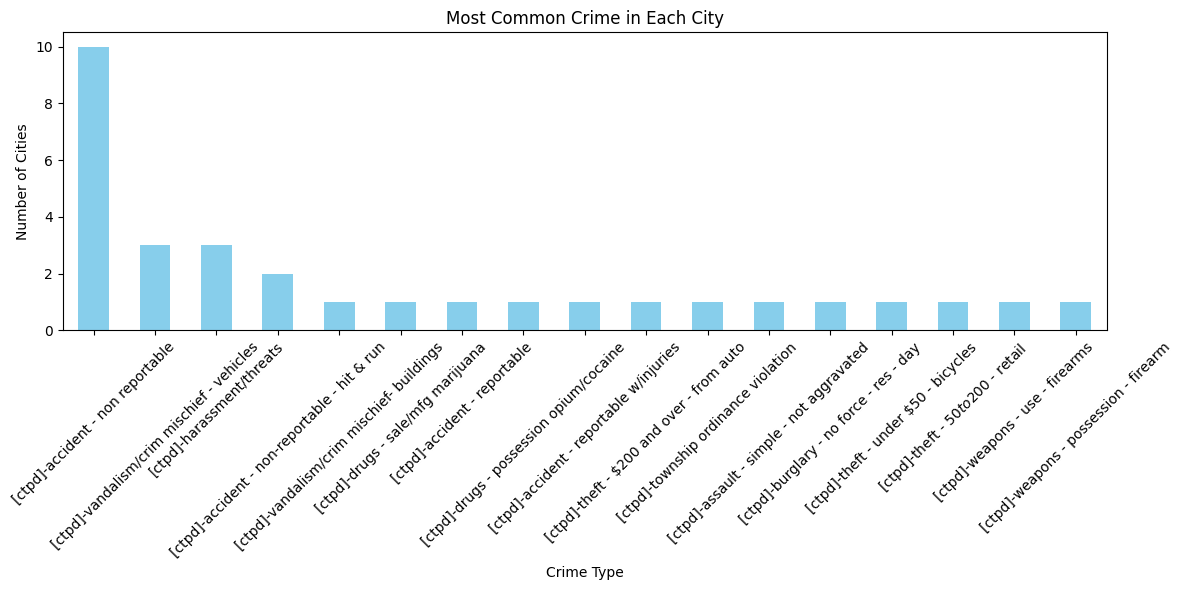

In [40]:
## This bar chart displays the most common crime types reported across different cities. It shows how many cities have each crime type as their most 
## frequent incident. The chart highlights which crime types are most commonly reported across multiple cities.

# Group by city and incident type, then get the most common crime for each city
most_common_crimes = cleaned_data.groupby('city')['incident_type_primary'].agg(lambda x: x.mode()[0])

# Count the occurrences of these most common crimes
crime_counts = cleaned_data.groupby('city')['incident_type_primary'].apply(lambda x: x.value_counts().idxmax())

# Plot the bar chart
plt.figure(figsize=(12, 6))
crime_counts.value_counts().plot(kind='bar', color='skyblue')
plt.title('Most Common Crime in Each City')
plt.xlabel('Crime Type')
plt.ylabel('Number of Cities')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

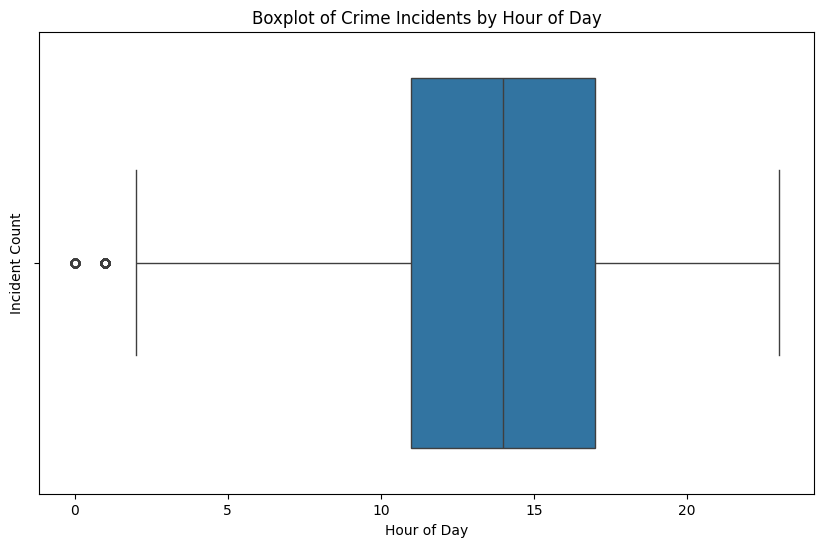

In [41]:

# Create a boxplot for the 'hour_of_day'
plt.figure(figsize=(10, 6))
sns.boxplot(data=cleaned_data, x='hour_of_day')
plt.title('Boxplot of Crime Incidents by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Incident Count')
plt.show()

Text(0, 0.5, 'Number of Incidents')

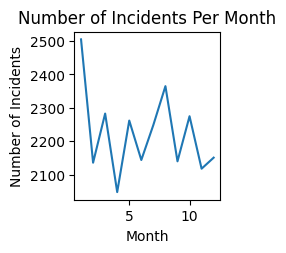

In [42]:
# Number of Incidents Per Month
incidents_per_month = cleaned_data.groupby('incident_month').size()

plt.subplot(2, 3, 4)
sns.lineplot(x=incidents_per_month.index, y=incidents_per_month.values)
plt.title('Number of Incidents Per Month')
plt.xlabel('Month')
plt.ylabel('Number of Incidents')
